In [1]:
import os
import io
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
%cd /content/drive/MyDrive/Colab Notebooks/SigmaML2024/SigmaML_OpenCV/
!pwd

/content/drive/MyDrive/Colab Notebooks/SigmaML2024/SigmaML_OpenCV
/content/drive/MyDrive/Colab Notebooks/SigmaML2024/SigmaML_OpenCV


Read Input Image

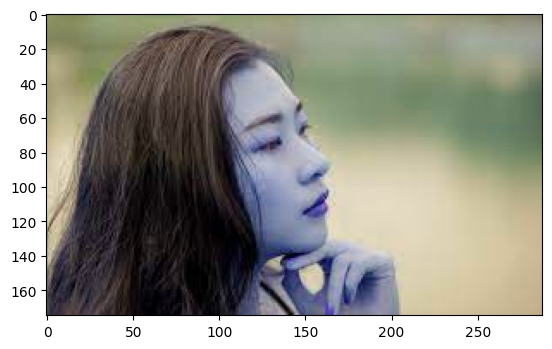

In [4]:
if os.path.exists("portrait_lady.png"):
  img = cv.imread("portrait_lady.png")

 # Check if the image was loaded correctly
  if img is not None:
    plt.imshow(img)
    plt.show()
  else:
      print("Error: Could not load image!")
else:
  print("Error: Image file not found!")

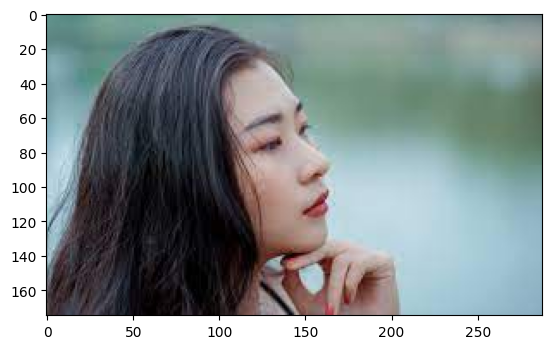

In [5]:
# Converting to RGB
RGB_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(RGB_img)

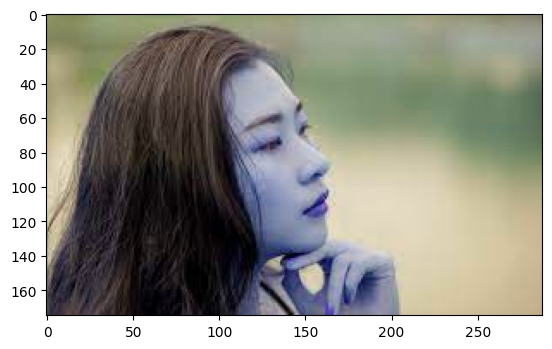

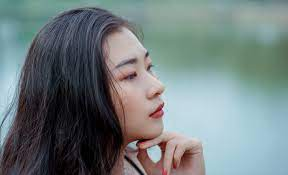

In [6]:
from google.colab.patches import cv2_imshow
cv2_imshow(img) # OG image

Q1. Enhance Contrast : Histogram Equilization

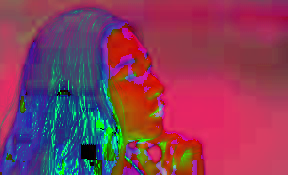

(175, 288, 3)

Output 1 :


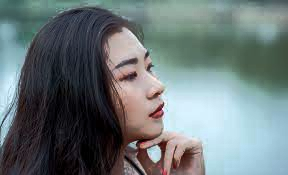

In [7]:
img = cv.imread("portrait_lady.png")
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
cv2_imshow(hsv)
print(hsv.shape)

# Equivalise the histogram
new_value = cv.equalizeHist(hsv[..., 2])
hsv[:, :, 2] = new_value

# Convert image back to BGR
equalized_image = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

print("\nOutput 1 :")
cv2_imshow(equalized_image)

Q2. Extract the mask : Thresholding

Otsu Threshold used :  102.0

Output 2(1) :


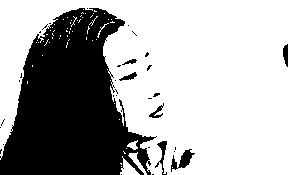

In [8]:
# Binary Thresholding - Converting to binary image
img = cv.imread('portrait_lady.png', cv.IMREAD_GRAYSCALE)

# Otsu's
ret, binary_img1 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print("Otsu Threshold used : ", ret)

print("\nOutput 2(1) :")
cv2_imshow(binary_img1)

Output 2(2) :


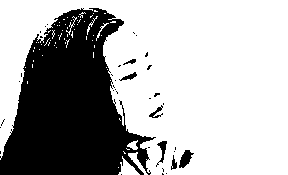

In [9]:
ret, binary_img2 = cv.threshold(img, 97, 255,cv.THRESH_BINARY)
print("Output 2(2) :")
cv2_imshow(binary_img2) # To Remove Black patch near the right corner to match the required output

Q3. Extract Edges : (a) Only Morphological Operations ; (b) Standard Edge Detector

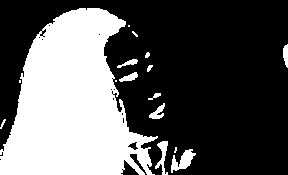

In [10]:
kernel = np.ones((2,2),np.uint8)
dilation = cv.dilate(~binary_img1,kernel,iterations = 1) # To fill gaps in hair
cv2_imshow(dilation)

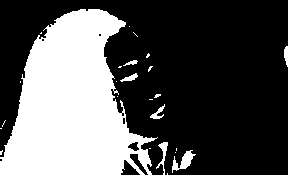

In [11]:
erosion = cv.erode(dilation,kernel,iterations = 1) # For thinner borders like desired output
cv2_imshow(erosion)

Output 3(a) :


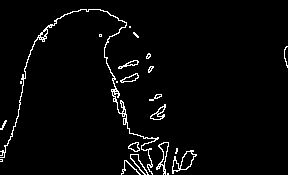

In [12]:
kernel = np.ones((2,2),np.uint8)
gradient = cv.morphologyEx(erosion, cv.MORPH_GRADIENT, kernel) # Difference of dilation and erosion
print("Output 3(a) :")
cv2_imshow(gradient)

Output 3(b) :


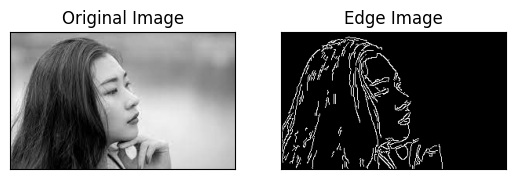

In [13]:
### Canny Edge Detector
img = cv.imread('portrait_lady.png', cv.IMREAD_GRAYSCALE)
edges = cv.Canny(img, 100, 200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
print("Output 3(b) :")
plt.show()

Q4. Segmentation using GrabCut()

(175, 288, 3)


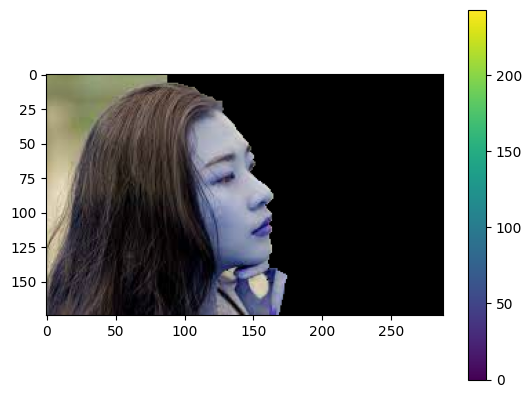

(<matplotlib.image.AxesImage at 0x7f49fea83790>,
 None)

In [35]:
img = cv.imread('portrait_lady.png')
print(img.shape)

mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (0, 0, 175, 288)

cv.grabCut(img, mask, rect, bgdModel, fgdModel, 1, cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
grabcut_img = img*mask2[:,:,np.newaxis]

plt.imshow(grabcut_img),plt.colorbar(),plt.show()

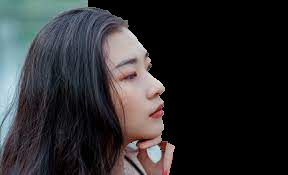

In [36]:
cv2_imshow(grabcut_img) # In Actual color, but not matching with desired output


Output 4 :


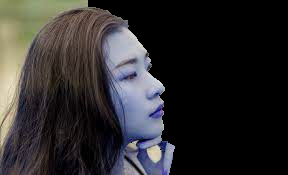

In [37]:
# Converting to imread color
bgr_grabcut_img = cv.cvtColor(grabcut_img, cv.COLOR_BGR2RGB)

print("\nOutput 4 :")
cv2_imshow(bgr_grabcut_img)

Saving Output

In [39]:
%cd /content/drive/MyDrive/Colab Notebooks/SigmaML2024/SigmaML_OpenCV/Output Images/
!pwd

/content/drive/MyDrive/Colab Notebooks/SigmaML2024/SigmaML_OpenCV/Output Images
/content/drive/MyDrive/Colab Notebooks/SigmaML2024/SigmaML_OpenCV/Output Images


In [40]:
# Saving the images
cv.imwrite('OutputQ1.png', equalized_image)
cv.imwrite('OutputQ2_1.png', binary_img1)
cv.imwrite('OutputQ2_2.png', binary_img2)
cv.imwrite('OutputQ3a.png', gradient)
cv.imwrite('OutputQ3b.png', edges)
cv.imwrite('OutputQ4_rgb.png', grabcut_img)
cv.imwrite('OutputQ4.png', bgr_grabcut_img)

True